In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
dataset = load_breast_cancer()
print(dataset.keys())
print(dataset.target_names)
print(dataset.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [25]:
x_train, x_val, y_train, y_val = train_test_split(dataset.data, dataset.target, test_size = 0.3, random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(398, 30)
(398,)
(171, 30)
(171,)


In [28]:
kfold = KFold(n_splits = 5, shuffle = False)
rand_clf = RandomForestClassifier(max_depth = 5) #나무
acc_list = []

for i, (train_index, valid_index) in enumerate(kfold.split(x)): 
    train_data = x_train[train_index]
    train_label = y_train[train_index]
    valid_data = x_val[valid_index]
    valid_label = y_val[valid_index]
    
    model = rand_clf.fit(train_data, train_label)
    acc = model.score(valid_data, valid_label)
    acc_list.append(acc)
    
    print('{}번째 Fold'.format(i+1), '정확도:{}'.format(acc))
avg = sum(acc_list) / 5

print(avg)

1번째 Fold 정확도:0.9333333333333333
2번째 Fold 정확도:1.0
3번째 Fold 정확도:0.9333333333333333
4번째 Fold 정확도:0.9666666666666667
5번째 Fold 정확도:0.9666666666666667
0.96


In [35]:
print('Feature Importances {}'.format(np.round(rand_clf.feature_importances_, 3)))

Feature Importances [0.048 0.014 0.047 0.022 0.007 0.019 0.087 0.128 0.006 0.007 0.014 0.005
 0.015 0.021 0.007 0.005 0.003 0.003 0.007 0.004 0.125 0.018 0.089 0.105
 0.02  0.031 0.018 0.107 0.005 0.013]


In [38]:
for name, value in zip(dataset.feature_names, rand_clf.feature_importances_):
    print('{}, value : {:.3f}'.format(name, value))

mean radius, value : 0.048
mean texture, value : 0.014
mean perimeter, value : 0.047
mean area, value : 0.022
mean smoothness, value : 0.007
mean compactness, value : 0.019
mean concavity, value : 0.087
mean concave points, value : 0.128
mean symmetry, value : 0.006
mean fractal dimension, value : 0.007
radius error, value : 0.014
texture error, value : 0.005
perimeter error, value : 0.015
area error, value : 0.021
smoothness error, value : 0.007
compactness error, value : 0.005
concavity error, value : 0.003
concave points error, value : 0.003
symmetry error, value : 0.007
fractal dimension error, value : 0.004
worst radius, value : 0.125
worst texture, value : 0.018
worst perimeter, value : 0.089
worst area, value : 0.105
worst smoothness, value : 0.020
worst compactness, value : 0.031
worst concavity, value : 0.018
worst concave points, value : 0.107
worst symmetry, value : 0.005
worst fractal dimension, value : 0.013


<AxesSubplot:>

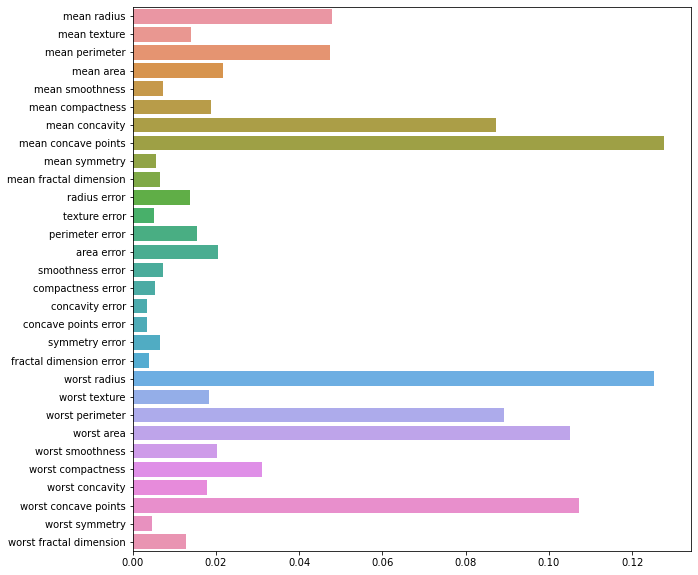

In [42]:
plt.figure(figsize = (10,10))
sns.barplot(x = rand_clf.feature_importances_, y = dataset.feature_names)